In [1]:
#----SHOW CORONA STATUS ON INDIA MAP------------

In [2]:
#import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from bs4 import BeautifulSoup
#import urllib.requests

In [3]:
#reading indian shapely file

data_map = gpd.read_file('Indian_States.shp')
print(data_map.head())

#printing 25 number state

data_map['st_nm'].iloc[25]

                      st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...


'Punjab'

In [4]:
#Extracting data from indian govt. site

url = 'https://www.mohfw.gov.in/'

#Request to extract data from site

web_content = requests.get(url).content

#Applying html parser to parser html content

soup = BeautifulSoup(web_content, "html.parser")

def extract_contents(row):
    return [x.text.replace('\n', '') for x in row]
stats = []
all_rows = soup.find_all('tr')
#print(all_rows)

for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    if len(stat)==6:
        stats.append(stat)

In [5]:
#Converting html data into dataframe

new_cols = ["S. No.", "Name of State / UT","Active Cases*","Cured/Discharged/Migrated*","Deaths**","Total Confirmed cases*"]

state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,31,45,0,76
1,2,Andhra Pradesh,7164,5908,169,13241
2,3,Arunachal Pradesh,121,60,1,182
3,4,Assam,2108,5088,10,7206
4,5,Bihar,2034,7118,60,9212


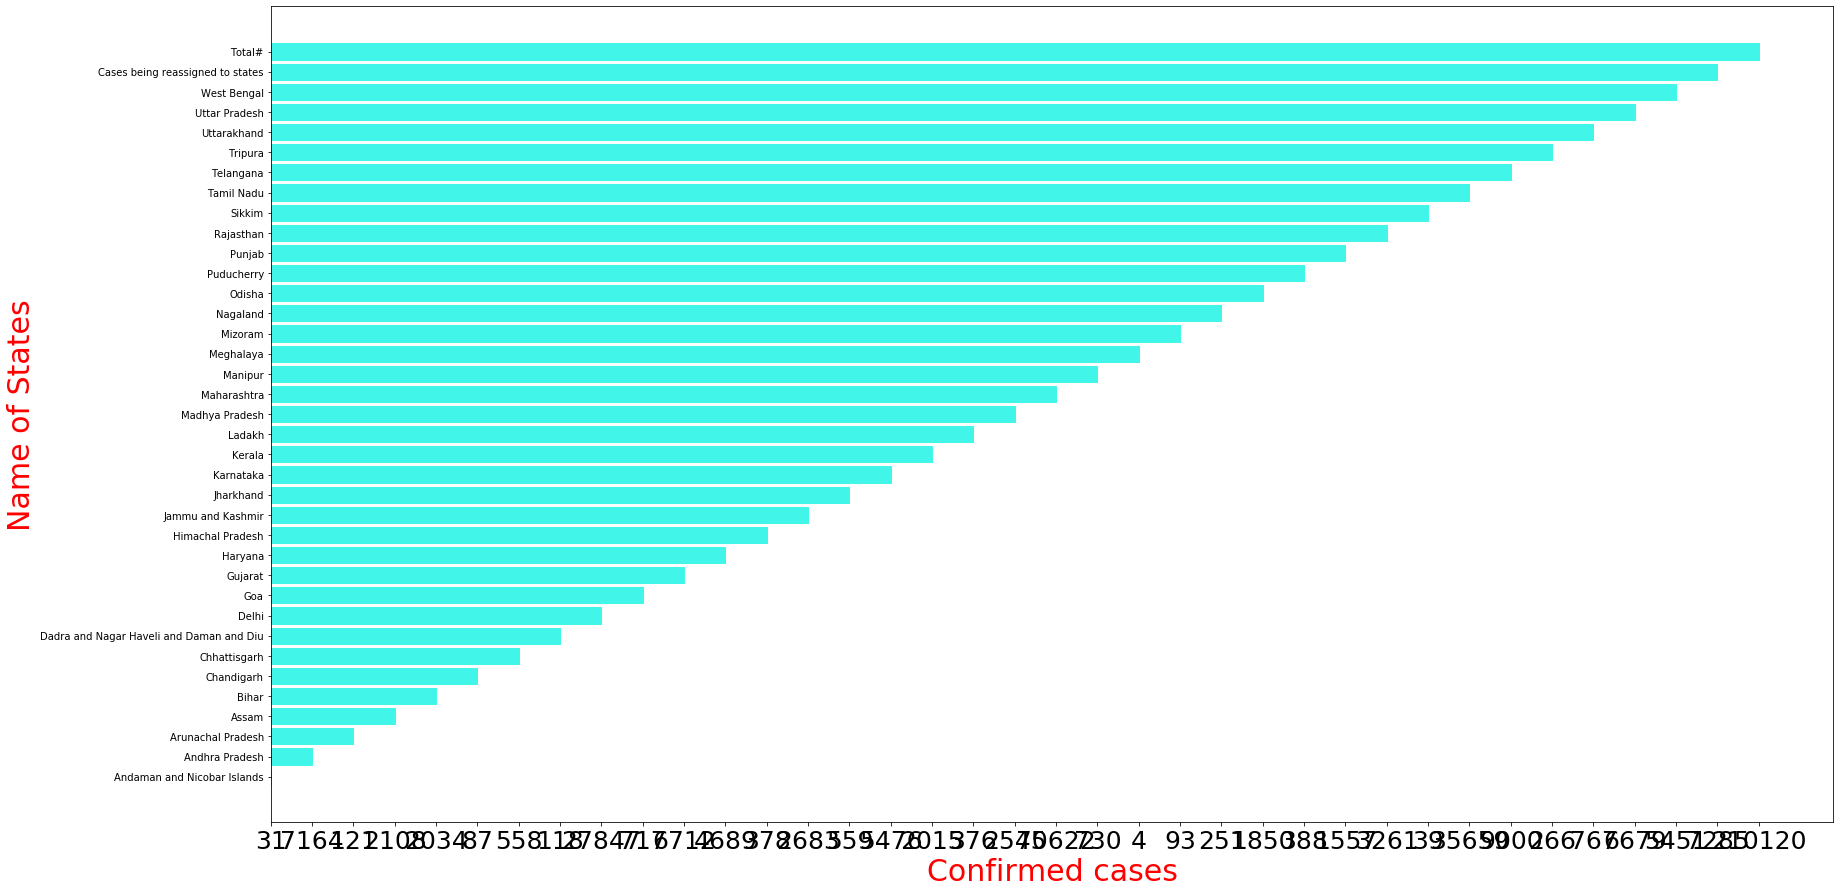

In [6]:
# SHOW CORONA STATUS ON PLOT A GRAPH 

import matplotlib.pyplot as plt
plt.figure(figsize=(28,15))
plt.barh(state_data["Name of State / UT"],state_data["Active Cases*"],Color="#42f5e9")
plt.xlabel("Confirmed cases",fontsize=30,color='red')
plt.ylabel("Name of States",fontsize=30,color='red')
plt.xticks(fontsize=25)
plt.xticks(fontsize=25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


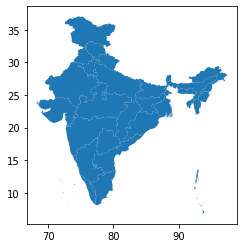

In [7]:
#Correction required to match names in both datasets

data_map.rename(columns={"st_nm":"Name of State / UT"},inplace=True)

data_map["Name of State / UT"] =data_map["Name of State / UT"].str.replace('&','and')

data_map["Name of State / UT"].iloc[0] = 'Andaman and Nicobar Islands'

data_map["Name of State / UT"].iloc[2] = 'Arunachal Pradesh'

data_map["Name of State / UT"].iloc[7] = 'Dadar Nagar Haveli'

data_map["Name of State / UT"].iloc[8] = 'Delhi'

data_map["Name of State / UT"].iloc[30]='Telengana'

#Plotting map of The India 

data_map.plot()

In [8]:
#Merging both datasets together
merged = pd.merge(data_map, state_data, on = "Name of State / UT")
merged.drop("S. No.", axis = 1, inplace = True)
merged.head()


,Name of State / UT,geometry,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",31,45,0,76
1,Arunachal Pradesh,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",121,60,1,182
2,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2034,7118,60,9212
3,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",87,336,6,429
4,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",558,2091,13,2662


In [9]:
print(merged.head())
print(merged.shape)

            Name of State / UT  \
0  Andaman and Nicobar Islands   
1            Arunachal Pradesh   
2                        Bihar   
3                   Chandigarh   
4                 Chhattisgarh   

                                            geometry Active Cases*  \
0  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...            31   
1  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...           121   
2  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...          2034   
3  POLYGON ((76.84147 30.75996, 76.83599 30.73623...            87   
4  POLYGON ((83.33532 24.09885, 83.35346 24.09627...           558   

  Cured/Discharged/Migrated* Deaths** Total Confirmed cases*  
0                         45        0                     76  
1                         60        1                    182  
2                       7118       60                   9212  
3                        336        6                    429  
4                       2091       13                   266

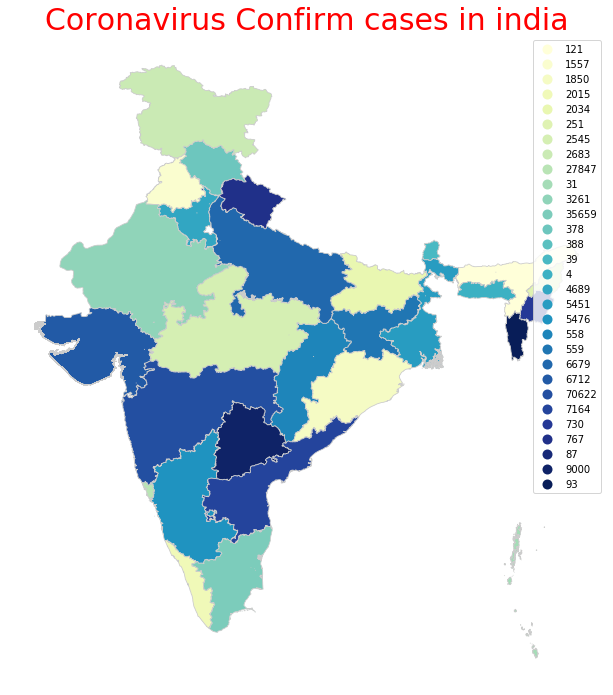

In [10]:
#plotting coronavirus cases on map
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
#Set the title of the map
ax.set_title('Coronavirus Confirm cases in india', fontsize=30,color="red")
merged.plot(column = 'Active Cases*',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8',legend=True)
plt.show()

In [11]:
#-------------NOW WE CHECK SOCIAL DISTANCING RULE FOLLOWED OR NOT IN INDIA---------#

import cv2

In [12]:
faceCascade = cv2.CascadeClassifier('face.xml')

image = cv2.imread('face4.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [13]:
faces=faceCascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5,minSize=(20, 20))
print(faces)

[[ 37  27  35  35]
 [206  29  38  38]
 [ 87  47  33  33]]


In [14]:
l=[]
i=1
lf=[]
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),4)
    s=str(i)
    cv2.putText(image,s,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    i=i+1
    l=[]
    l.append(x)
    l.append(y)
    lf.append(l)
    print(l)
    #print(lf)
print(lf)

[37, 27]
[206, 29]
[87, 47]
[[37, 27], [206, 29], [87, 47]]


In [15]:
close_person=""
import math
for i in range(len(lf)):
    print(lf[i])
    
    for j in range(i+1,len(lf)):
        print(lf[j])
        d=math.sqrt(((lf[j][1]-lf[i][1])**2)+((lf[j][0]-lf[i][0])**2))
        print(d)
       
    if d<400:
        close_person = close_person+ "Person"+str(i+1)+" and Person"+str(j+1)+";"
close_person+="are not following social distancing"
print(close_person)


[37, 27]
[206, 29]
169.01183390520322
[87, 47]
53.85164807134504
[206, 29]
[87, 47]
120.3536455617361
[87, 47]
Person1 and Person3;Person2 and Person3;Person3 and Person3;are not following social distancing


In [ ]:
#----------SHOW FACE DETECTION----------------#


cv2.imshow('Following social distancinhg or Not',image)
cv2.waitKey(0)
 